# Modelagem Empírica

targets: `consumoEspecificoTG2_2`, `consumoEspecificoTG2_1`, `consumoEspecificoTG1_2`, `consumoEspecificoTG1_1`


## Objective

- Develop an empirical model of the industrial process using AI.
- Achieve millisecond response times for the model.
- Ensure a maximum error of 0.2% compared to the digital twin.

### Ideas

- If the simulations are many in sequence, a time series model can be used

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('./data/raw/SimulationResult.json')
df.head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
0,0,273.0,57.0,718.0,107.0,53.000,0,0,0.000000,0.000000,0.000000,0.000000,298.992329,403.15,2.3,0.000000,0.000000,0.000000,0.000000,OK
1,1,273.0,57.0,718.0,107.0,53.000,0,1,0.000000,2.743378,7.277625,0.000000,294.620543,403.15,2.3,12.028968,7.282596,0.000000,0.000000,OK
2,2,273.0,57.0,718.0,107.0,53.000,1,0,13.876143,0.000000,0.000000,3.107132,254.569586,403.15,2.3,0.000000,0.000000,7.711077,34.436903,OK
3,3,273.0,57.0,718.0,107.0,53.000,1,1,13.876143,2.743378,7.277625,3.107132,254.569586,403.15,2.3,12.028968,7.282596,7.711077,34.436903,OK
4,4,273.0,57.0,718.0,107.0,61.375,0,0,0.000000,0.000000,0.000000,0.000000,288.558739,403.15,2.3,0.000000,0.000000,0.000000,0.000000,OK


In [3]:
features = ['vazaoVapor', 'pressaoVapor', 'temperaturaVapor',
            'cargaVaporTG1', 'cargaVaporTG2', 'habilitaTG1', 'habilitaTG2']

In [4]:
targets = ['consumoEspecificoTG1_1', 'consumoEspecificoTG1_2',
           'consumoEspecificoTG2_1', 'consumoEspecificoTG2_2',
           'potenciaGeradaTG1_1', 'potenciaGeradaTG1_2',
           'potenciaGeradaTG2_1', 'potenciaGeradaTG2_2',
           'vazaoVaporEscape']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72900 entries, 0 to 72899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   step                    72900 non-null  int64  
 1   vazaoVapor              72900 non-null  float64
 2   pressaoVapor            72900 non-null  float64
 3   temperaturaVapor        72900 non-null  float64
 4   cargaVaporTG1           72900 non-null  float64
 5   cargaVaporTG2           72900 non-null  float64
 6   habilitaTG1             72900 non-null  int64  
 7   habilitaTG2             72900 non-null  int64  
 8   potenciaGeradaTG1_2     72871 non-null  float64
 9   potenciaGeradaTG2_2     72871 non-null  float64
 10  potenciaGeradaTG2_1     72871 non-null  float64
 11  potenciaGeradaTG1_1     72871 non-null  float64
 12  vazaoVaporEscape        72871 non-null  float64
 13  temperaturaVaporEscape  72871 non-null  float64
 14  pressaoVaporEscape      72871 non-null

In [6]:
df['status'].value_counts()

status
OK                    72871
Falha na simulação       29
Name: count, dtype: int64

In [7]:
df.query('status == "Falha na simulação"').head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
752,752,273.000,57.0,797.5,148.0,120.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
3266,3266,273.000,60.0,718.0,107.0,103.250,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
5142,5142,273.000,61.5,718.0,250.5,111.625,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
15231,15231,290.875,63.0,797.5,107.0,53.000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
17092,17092,308.750,57.0,797.5,230.0,111.625,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação


In [8]:
df.step.is_unique

True

In [9]:
df.shape

(72900, 20)

In [10]:
df['consumoEspecificoTG1_1'].nunique()

226

In [11]:
df['vazaoVapor'].value_counts()

vazaoVapor
273.000    8100
290.875    8100
308.750    8100
326.625    8100
344.500    8100
362.375    8100
380.250    8100
398.125    8100
416.000    8100
Name: count, dtype: int64

In [12]:
df['temperaturaVapor'].value_counts()

temperaturaVapor
718.00    14580
757.75    14580
797.50    14580
837.25    14580
877.00    14580
Name: count, dtype: int64

In [13]:
df['cargaVaporTG1'].value_counts()

cargaVaporTG1
107.0    8100
127.5    8100
148.0    8100
168.5    8100
189.0    8100
209.5    8100
230.0    8100
250.5    8100
271.0    8100
Name: count, dtype: int64

In [14]:
convert_dict = {
    'step': np.int32,
    'habilitaTG1': np.int32,
    'habilitaTG2': np.int32,
    'status': str
}

In [15]:
# Filter and change data types
df_clean = df.query('status == "OK"').copy().astype(convert_dict).drop(columns=['status', 'step'])
df_clean.head()

,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1
0,273.0,57.0,718.0,107.0,53.000,0,0,0.000000,0.000000,0.000000,0.000000,298.992329,403.15,2.3,0.000000,0.000000,0.000000,0.000000
1,273.0,57.0,718.0,107.0,53.000,0,1,0.000000,2.743378,7.277625,0.000000,294.620543,403.15,2.3,12.028968,7.282596,0.000000,0.000000
2,273.0,57.0,718.0,107.0,53.000,1,0,13.876143,0.000000,0.000000,3.107132,254.569586,403.15,2.3,0.000000,0.000000,7.711077,34.436903
3,273.0,57.0,718.0,107.0,53.000,1,1,13.876143,2.743378,7.277625,3.107132,254.569586,403.15,2.3,12.028968,7.282596,7.711077,34.436903
4,273.0,57.0,718.0,107.0,61.375,0,0,0.000000,0.000000,0.000000,0.000000,288.558739,403.15,2.3,0.000000,0.000000,0.000000,0.000000


## Splitting features and targets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
print('Número de targets:', len(targets))

Número de targets: 9


In [18]:
train_set, test_set = df_clean[features], df_clean[targets]

In [19]:
X_train, X_test_full, y_train, y_test_full = train_test_split(train_set, test_set, test_size=0.2, random_state=42)

In [20]:
# Criando dataset de validação
X_test, X_val, y_test, y_val = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=42)

In [21]:
X_train.shape[0] / train_set.shape[0]

0.7999890216958735

In [22]:
X_test.shape[0] / train_set.shape[0]

0.09999862771198419

In [23]:
X_val.shape[0] / train_set.shape[0]

0.10001235059214228

In [24]:
# Save datasets
X_train.to_csv('./data/processed/X_train.csv', index=False)
X_test.to_csv('./data/processed/X_test.csv', index=False)
X_val.to_csv('./data/processed/X_val.csv', index=False)

## Creating neural network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.models import load_model

In [28]:
new_train = False

try:
    if new_train:
        raise Exception('Forçando novo treinamento')
    model = load_model('./models/dense_64_32_11_mse_v2.keras')
    print('Pre-trained model loaded successfully')
except Exception as e:
    print('Could not load model:', e.__repr__())
    model = Sequential()

    model.add(Input(shape=(len(features),)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(targets)))

    model.compile(optimizer='adam', loss='mean_squared_error')

Pre-trained model loaded successfully


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,889 (11.29 KB)

 Trainable params: 2,889 (11.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint('./models/dense_64_32_11_mse_v4.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [46]:
if new_train:
    # Set model train seed
    set_random_seed(42)

    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/1000
1781/1822 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 4.9518
Epoch 1: val_loss improved from inf to 3.96097, saving model to ./models/dense_64_32_11_mse_v4.keras
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 4.9552 - val_loss: 3.9610
Epoch 2/1000
1756/1822 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 4.9323
Epoch 2: val_loss did not improve from 3.96097
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 4.9379 - val_loss: 3.9793
Epoch 3/1000
1735/1822 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 4.8883
Epoch 3: val_loss improved from 3.96097 to 3.93843, saving model to ./models/dense_64_32_11_mse_v4.keras
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 4.8962 - val_loss: 3.9384
Epoch 4/1000
1744/1822 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 4.8493
Epoch 4: val_loss improved from 3.93843 to 3.88521, saving model to ./models/dense_64_32_11_mse_v4.keras
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - loss: 4.8567 - val_loss: 3.8852
Epoch 5/1000
1767/1822 ━━━━━━━━━━━

In [29]:
def symetric_mape(A, F):
    """
    Symmetric Mean Absolute Percentage Error (SMAPE) metric.

    Parameters
    ----------
    A : np.array
        Actual values.

    F : np.array
        Forecasted values.

    Returns
    -------
    float
        SMAPE metric value.
    
    """
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

### Reference values for MAPE and SMAPE

| MAPE Value | SMAPE Value | Predictive Performance Evaluation
| :-: | :-: | :-: |
| < 10% | <10% | Highly accurate forecasting |
| 10-20% | 10-20% | Good forecasting |
| 20-50% | 20-50% | Reasonable forecasting |
| >50% | >50% | Inaccurate forecasting |


In [30]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [31]:
y_pred = model.predict(X_test)

smape = np.array([symetric_mape(y_test[target], y_pred[:, i]) for i, target in enumerate(targets)])
mape = np.array([mean_absolute_percentage_error(y_test[target], y_pred[:, i]) for i, target in enumerate(targets)])
r_2 = np.array([r2_score(y_test[target], y_pred[:, i]) for i, target in enumerate(targets)])
mse = np.array([np.mean((y_test[target] - y_pred[:, i])**2) for i, target in enumerate(targets)])

# Create a DataFrame with the MAPE for each target
mape_df = pd.DataFrame({'mape': mape, 'smape': smape, 'r2': r_2, 'mse': mse}, index=targets).sort_values('mse')
mape_df

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


,mape,smape,r2,mse
consumoEspecificoTG1_2,3.656196e+14,99.655023,0.994989,0.114991
potenciaGeradaTG2_2,1.611989e+15,107.145149,0.941030,0.540459
potenciaGeradaTG1_2,9.095740e+14,99.719345,0.994636,0.554716
consumoEspecificoTG2_2,9.042337e+14,105.186075,0.976840,0.786673
potenciaGeradaTG1_1,1.311101e+15,101.533810,0.993156,1.040905
potenciaGeradaTG2_1,2.049823e+15,105.426361,0.985323,1.224871
consumoEspecificoTG1_1,8.267670e+14,103.671293,0.968849,2.008029
consumoEspecificoTG2_1,3.720910e+15,112.501693,0.924523,4.290878
vazaoVaporEscape,4.832264e-03,0.483144,0.999057,4.480604


(0.0, 10000.0)

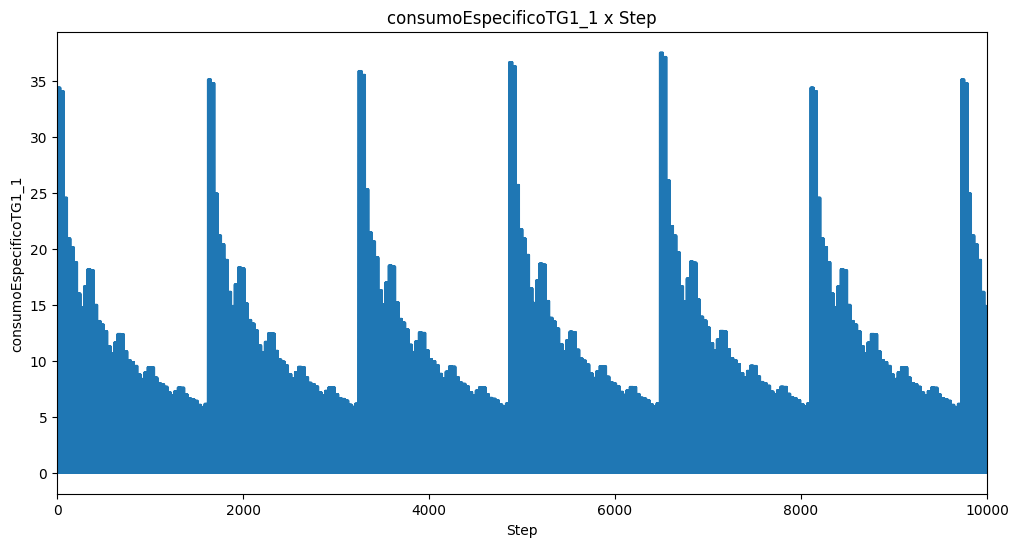

In [75]:
# Plot consumoEspecificoTG1_1 in y axis and step in x
plt.figure(figsize=(12, 6))
plt.plot(df['consumoEspecificoTG1_1'])
plt.xlabel('Step')
plt.ylabel('consumoEspecificoTG1_1')
plt.title('consumoEspecificoTG1_1 x Step')
plt.xlim(0, 10000)

456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


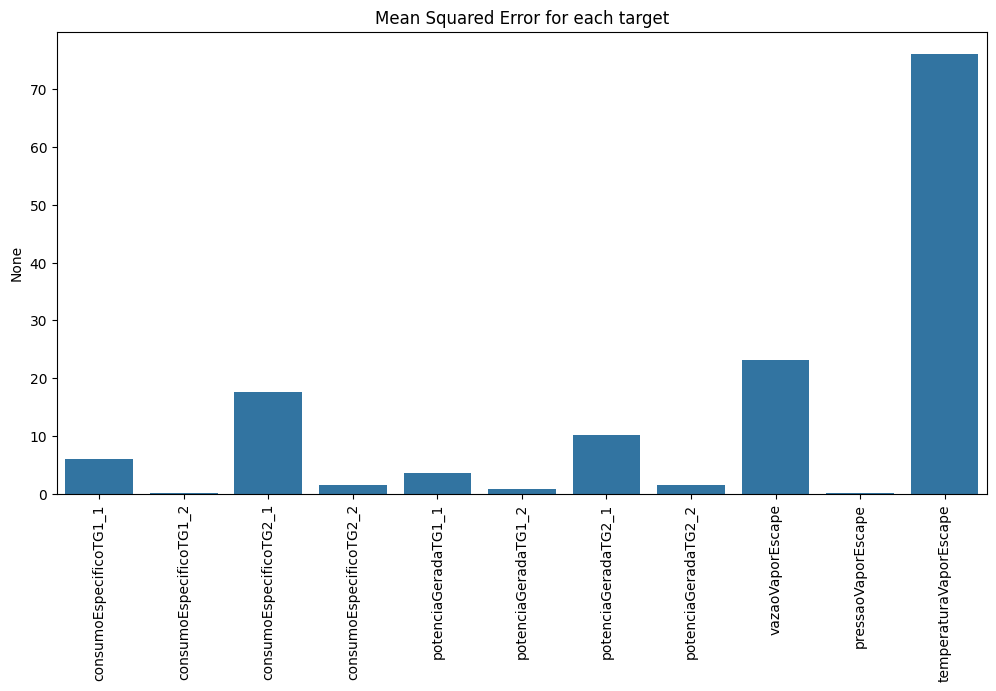

In [28]:
# Predicting the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error for each target
mse = np.mean((y_test - y_pred) ** 2, axis=0)

# Plotting the mean squared error for each target
plt.figure(figsize=(12, 6))
sns.barplot(x=targets, y=mse)
plt.xticks(rotation=90)
plt.title('Mean Squared Error for each target')
plt.show()


  1/456 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step

456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


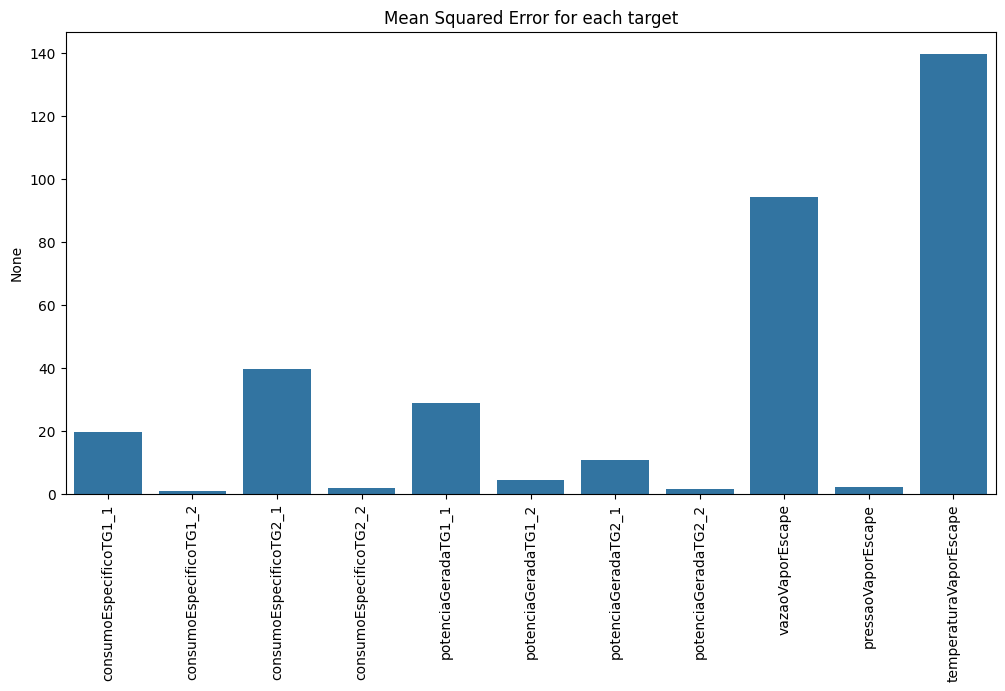

In [92]:
# Predicting the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error for each target
mse = np.mean((y_test - y_pred) ** 2, axis=0)

# Plotting the mean squared error for each target
plt.figure(figsize=(12, 6))
sns.barplot(x=targets, y=mse)
plt.xticks(rotation=90)
plt.title('Mean Squared Error for each target')
plt.show()
